In [1]:
from __future__ import print_function, division

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from marriages_replication import *

# Gaygents

## Serena Chen and Apurva Raman

## Abstract

Ortega and Hergovich, in their paper “The Strength of Absent Ties” [1] model marriages in social networks as influenced by online dating. They find that there are far more interracial couples as a result of online dating (modeled by the addition of more interracial connections), and that the marriages are stronger. Ortega and Hergovich’s only model heterosexual marriages, so we modify the model to see if their result holds when not all of the marriages are heterosexual. **[result here]** We find that when bisexual agents of the same gender have a higher affinity for each other, **[result here]**


## Methodology and Modeling Decisions
Ortega and Hergovich model marriages in social networks to find how online dating affects the welfare of the society, particularly in regards to racial diversity and integration. 

To do this, they construct an Erdos-Renyi random graph where each node is an agent that has a binary sex, a categorical race, and two variables that represent their preferences. The preferences of each agent are a randomly chosen variable between 0 and 1. The closer one agent’s preferences to another, the more affinity they have for each other. At each timestep in the simulation, agents will point to the agent they are connected that has the closest preferences. If that agent also points at them, they are married. The likelihood of interracial and intraracial connections in the network are inputs to the model. 

Ortega and Hergovich note that people often interact with many more people of the same race offline because societies tend to be segregated. However, online dating allows strangers to meet, which corresponds to an increased likelihood of interracial connections. Thus, they model the presence of online dating by increasing the likelihood of interracial connections. The assumption that people do not have many interracial connections doesn’t hold true in the world because [people of a minority race will tend to have connections to people of a majority race while people of a majority race may not have many connections to minorities](https://www.washingtonpost.com/news/wonk/wp/2014/08/25/three-quarters-of-whites-dont-have-any-non-white-friends/?utm_term=.d9e9b0a7ae47). However, for simplicity they choose to make each race equally common, so that there are no minorities or majorities. 



## Replication

Ortega and Hergovich have the original MATLAB code freely available on Ortega’s website, so we reimplement the experiment in python and check that the behavior of our experiment matches the behavior of Ortega’s MATLAB code. We have two ways of checking that the experiment is replicated correctly. The first is to check that similar parameters give similar results in both the MATLAB implementation and our Python implementation (Figure 1). The results are not be identical since there is an element of randomness in the models, but they are close.


In [2]:
diversity,percent_married,compatibility = runSim(100, 3, 0.7, 0.4, marr_type=2)
print('diversity (race)', diversity)
print('compatibility (avgdist)', compatibility)
print('percent married (number)', percent_married)

diversity (race) 1.1404109589
compatibility (avgdist) 0.937355216821
percent married (number) 0.973333333333


<img src="replication.png" alt="" align="left">

**Figure 1:** The top shows the result of the Python code. The bottom shows the result of the MATLAB code. They were both run with 3 races, 100 agents per race, 70% probability of a connection within a race, and 40% probability of a connection between races.

The second method of checking that the behavior is the same is to verify the graphs in the paper are consistent with graphs we generate. Ortega and Hergovich have some graphs where they plot diversity and compatibility with respect to a changing probability of having an interracial connection Their graphs and our graphs are shown below in figures 2 and 3.

In [3]:
probabilities = np.linspace(0.0, 1.0, num=15, dtype=float)
num_sims = 30

diversities = []
strengths = []

for prob_interracial in probabilities:
    div_sum = 0.0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength = runSim(50, 2, 1.0, prob_interracial)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

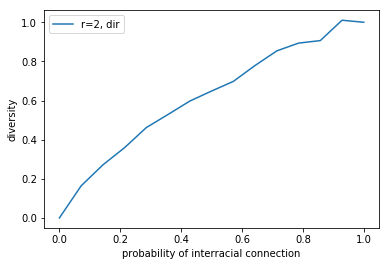

In [4]:
plt.figure()
plt.xlabel('probability of interracial connection')
plt.ylabel('diversity')
r2dir, = plt.plot(probabilities, diversities, label='r=2, dir')
plt.legend(handles=[r2dir])
plt.show()

<img src="diversity_original.png" alt="" align="left" width="500">

**Figure 2:** The average compatibility (0-1, where 1 is perfectly compatible/everyone married someone of identical personality) as the probability of interracial connections increase. The top is our graph, bottom is Ortega and Hergovich’s graph

Our graph has roughly the same shape as Ortega and Hergovich’s, but there is much more noise. Both our simulation and Ortega and Hergovich’s simulation was run repeatedly and averaged, but Ortega and Hergovich do not report how many times the simulation was run. The difference is likely due to the discrepancy in the number of runs. From this, we can tell that as interracial connections increase, compatibility and strength of marriages increases as well, but at a decreasing rate. This gives us confidence that our replication of the Ortega and Hergovich model was successful. 


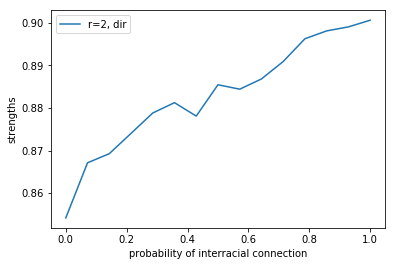

In [7]:
plt.figure()
plt.xlabel('probability of interracial connection')
plt.ylabel('strengths')
plt.plot(probabilities, strengths, label='r=2, dir')
plt.legend(handles=[r2dir])
plt.show()

<img src="strength_original.png" alt="" align="left" width="500">

**Figure 3:** The percentage of interracial marriages to the percentage of possible interracial links (where 1 means that number of interracial marriages matches the number of interracial marriages if we had just randomly picked pairs to marry) as the probability of interracial connections increase. The top is our graph, bottom is Ortega and Hergovich’s graph.

Similarly to Figure 2, our graph is similar in shape to Ortega and Hergovich’s, with some noise. We get the same result as Ortega and Hergovich, which is that as interracial connections increase, so do interracial links. 


## Extension

Rosenfeld and Thomas’s 2012 paper, “Searching for a mate: the rise of the internet as a social intermediary,” states that same-sex couples are more likely than heterosexual couples to find their partner through online dating[2]. Ortega and Hergovich address this in their paper, but state that introducing same-sex couples would cause instability in the model. 

Our first experiment is to add in bisexuality. This simply removed the constraint that agents could only point to members of the opposite gender. 
